<a href="https://colab.research.google.com/github/erossi2/AnalisiDati/blob/main/TeCHE_Simulation_updated_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, rankdata
from sklearn.datasets import make_spd_matrix
from mpl_toolkits.mplot3d import Axes3D

from google.colab import drive
drive.mount('/content/drive')

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 5000

# Simulated variables
# We'll simulate 7 correlated variables:
# - Age: 18 to 80
# - sex: 0 to 2: F, M, I prefer not to answer
# - willingness to travel: 1 - 3
# - 6 variables Journey proposal: 1 to 9
# - marital status: 1 to 4
# - qualification: 1 to 6
# - employment: 1 - 5
# - Target (overall): 1 to 9

# Simulated correlated variables
# We'll simulate 7 correlated variables:
# - Age: 18 to 80
# - 3 variables Journey proposal: 1 to 9
# - 1 variable willingness to travel: 1 to 3
# - 1 qualification: 1 to 6
# - marital status: 1 to 4

def generate_custom_spd_matrix(n, seed=None):
    if seed:
        np.random.seed(seed)
# Start with identity matrix for 1s on the diagonal
    A = np.eye(n)

    # Set specific off-diagonal elements to negative values
    A[0, 1] = A[1, 0] = -0.9
    A[0, 2] = A[2, 0] = -0.85
    A[0, 6] = A[6, 0] =  0.5
    #A[0, 7] = A[0, 7] =  0.
    A[1, 7] = A[7, 1] =  -0.95
    A[2, 7] = A[7, 2] =  -0.85
    A[3, 7] = A[7, 3] =  0.55
    A[4, 7] = A[7, 4] =  0.55
    A[5, 7] = A[7, 5] =  0.85
    A[6, 7] = A[7, 6] =  0.95

    # Fill in remaining symmetric values with small random values
    for i in range(n):
        for j in range(i+1, n):
            if A[i, j] == 0:
                val = np.random.uniform(0.5, 0.9)
                A[i, j] = A[j, i] = val

    # Ensure positive definiteness using Cholesky decomposition
    epsilon = 1e-6
    while True:
        try:
            np.linalg.cholesky(A)
            break
        except np.linalg.LinAlgError:
            A += epsilon * np.eye(n)

    return A

# Generate the matrix
corr_matrix = generate_custom_spd_matrix(10, seed=22)

print("Custom 7x7 SPD Matrix with specified constraints:")
print(np.round(corr_matrix, 2))

print("Symmetric Positive Definite Matrix (7x7) with unit diagonal:")

#corr_matrix = make_spd_matrix(7)
# Step 1: Create a correlation matrix for the variables
#corr_matrix = np.array([
#    [1.0,   -0.65,  -0.6,   0.4,   0.7,   0.5,    -0.6],
#    [-0.65,   1.0,   0.9,   0.2,   0.6,   0.5,    0.75],
#    [-0.6,   0.9,   1.0,   0.3,   0.5,   0.45,   0.45],
#    [0.4,    0.2,   0.3,   1.0,   0.8,   0.8,    0.55],
#    [0.7,    0.6,   0.5,   0.8,   1.0,   0.95,   0.65],
#    [0.5,    0.5,   0.45,   0.8,  0.95,   1.0,   0.45],
#    [-0.6,  0.75,  0.45,  0.55,   0.65,  0.45,    1.0]
#])

print(corr_matrix)

# Step 2: Generate multivariate normal samples for the first 7 variables
mean = np.zeros(10)
L = np.linalg.cholesky(corr_matrix)  # Cholesky decomposition
z = np.random.randn(n_samples, 10)
corr_data = z @ L.T


# Normalize and discretize
age = np.round(np.interp(corr_data[:, 0], (corr_data[:, 0].min(), corr_data[:, 0].max()), (18, 80))).astype(int)
digital = np.round(np.interp(corr_data[:, 1], (corr_data[:, 1].min(), corr_data[:, 1].max()), (1, 9))).astype(int)
game = np.round(np.interp(corr_data[:, 2], (corr_data[:, 2].min(), corr_data[:, 2].max()), (1, 9))).astype(int)
olio = np.round(np.interp(corr_data[:, 3], (corr_data[:, 3].min(), corr_data[:, 3].max()), (1, 9))).astype(int)
piatti = np.round(np.interp(corr_data[:, 4], (corr_data[:, 4].min(), corr_data[:, 4].max()), (1, 9))).astype(int)
pasta = np.round(np.interp(corr_data[:, 5], (corr_data[:, 5].min(), corr_data[:, 5].max()), (1, 9))).astype(int)
arte = np.round(np.interp(corr_data[:, 6], (corr_data[:, 6].min(), corr_data[:, 6].max()), (1, 9))).astype(int)
# Generate the variable overall (tsarget)
unif_corr_data = norm.cdf(corr_data)
#target = np.floor(corr_data[:, 7] * 7).astype(int)
bins_target = [0.0, 0.04, 0.27, 0.47, 0.75, 0.93, 1.0]
target= np.digitize(unif_corr_data[:, 7], bins=bins_target)
#target = np.round(np.interp(unif_corr_data[:, 7], (unif_corr_data[:, 7].min(), unif_corr_data[:, 7].max()), (1, 6))).astype(int)
#target = np.round(np.interp(corr_data[:, 7], (corr_data[:, 7].min(), corr_data[:, 7].max()), (1, 6))).astype(int)
travel = np.round(np.interp(corr_data[:, 8], (corr_data[:, 8].min(), corr_data[:, 8].max()), (1, 3))).astype(int)
bins_sex = [0.0, 0.52, 0.995, 1.0]
sex = np.digitize(unif_corr_data[:, 9], bins=bins_sex)
dist_viag=
org_viag=
acq_viag=
notti_viag=
attiv_viag=
comp_viag=
spesa_viag=
souv_viag=
guida_viag=
freq_viag=
inte_viag=
eta_q =
#sex = np.round(np.interp(unif_corr_data[:, 9], (unif_corr_data[:, 9].min(), unif_corr_data[:, 9].max()), (1, 3))).astype(int)

# Simulate uncorrelated variables
uncorr_vars = {}
#    f"Uncorr{i}": np.random.randint(1, 10, n_samples) for i in range(3)
#}

# Generate the variable sex
#values = [1, 2, 3]
#probabilities = [0.50, 0.45, 0.05]
#uncorr_vars['Sex'] = np.random.choice(values, size=n_samples, p=probabilities)

# Generate the variable marital
values = [1, 2, 3, 4]
probabilities = [0.35, 0.25, 0.2, 0.2]
uncorr_vars['stato_civ'] = np.random.choice(values, size=n_samples, p=probabilities)


# Generate the variable
#values = [1, 2, 3, 4, 5, 6, 7, 8, 9]
#probabilities = [0.05, 0.07, 0.11, 0.13, 0.2, 0.21, 0.13, 0.07, 0.03]
#uncorr_vars['arte']= np.random.choice(values, size=n_samples, p=probabilities)

# Generate the variable employment
values = [1, 2, 3, 4, 5]
probabilities = [0.15, 0.25, 0.30, 0.1, 0.20]
uncorr_vars['occupazione'] = np.random.choice(values, size=n_samples, p=probabilities)


# Generate the variable qualification
values = [1, 2, 3, 4, 5, 6]
probabilities = [0.05, 0.15, 0.35, 0.20, 0.15, 0.10]
uncorr_vars['istruzione'] = np.random.choice(values, size=n_samples, p=probabilities)

# Generate the variable qualification
values = [1, 2, 3, 4, 5, 6]
probabilities = [0.05, 0.15, 0.35, 0.20, 0.15, 0.10]
uncorr_vars['residenza'] = np.random.choice(values, size=n_samples, p=probabilities)


# Combine into DataFrame Complete
data = pd.DataFrame({
     'Eta': age,
     'digital': digital,
     'game': game,
     'Olio': olio,
     'Piatti': piatti,
     'Pasta': pasta,
     'Arte': arte,
     'Travel': travel,
     'Target': target,
     'Sex': sex,
    **uncorr_vars
})

# Save data
csv_path = '/content/drive/My Drive/Colab Notebooks/simulated_discrete_variables_complete_quest_SexCorrelated.csv'
data.to_csv(csv_path, index=False)

Mounted at /content/drive
Custom 7x7 SPD Matrix with specified constraints:
[[ 2.85 -0.9  -0.85  0.58  0.69  0.67  0.5   0.84  0.57  0.64]
 [-0.9   2.85  0.61  0.78  0.59  0.82  0.5  -0.95  0.72  0.83]
 [-0.85  0.61  2.85  0.8   0.58  0.5   0.81 -0.85  0.88  0.78]
 [ 0.58  0.78  0.8   2.85  0.62  0.81  0.78  0.55  0.65  0.75]
 [ 0.69  0.59  0.58  0.62  2.85  0.67  0.73  0.55  0.78  0.54]
 [ 0.67  0.82  0.5   0.81  0.67  2.85  0.87  0.85  0.9   0.77]
 [ 0.5   0.5   0.81  0.78  0.73  0.87  2.85  0.95  0.82  0.51]
 [ 0.84 -0.95 -0.85  0.55  0.55  0.85  0.95  2.85  0.57  0.85]
 [ 0.57  0.72  0.88  0.65  0.78  0.9   0.82  0.57  2.85  0.8 ]
 [ 0.64  0.83  0.78  0.75  0.54  0.77  0.51  0.85  0.8   2.85]]
Symmetric Positive Definite Matrix (7x7) with unit diagonal:
[[ 2.851276   -0.9        -0.85        0.58338421  0.69267242  0.66821521
   0.5         0.8436728   0.56846462  0.63554558]
 [-0.9         2.851276    0.60821313  0.77641654  0.58816181  0.82478037
   0.50421075 -0.95        0.7244

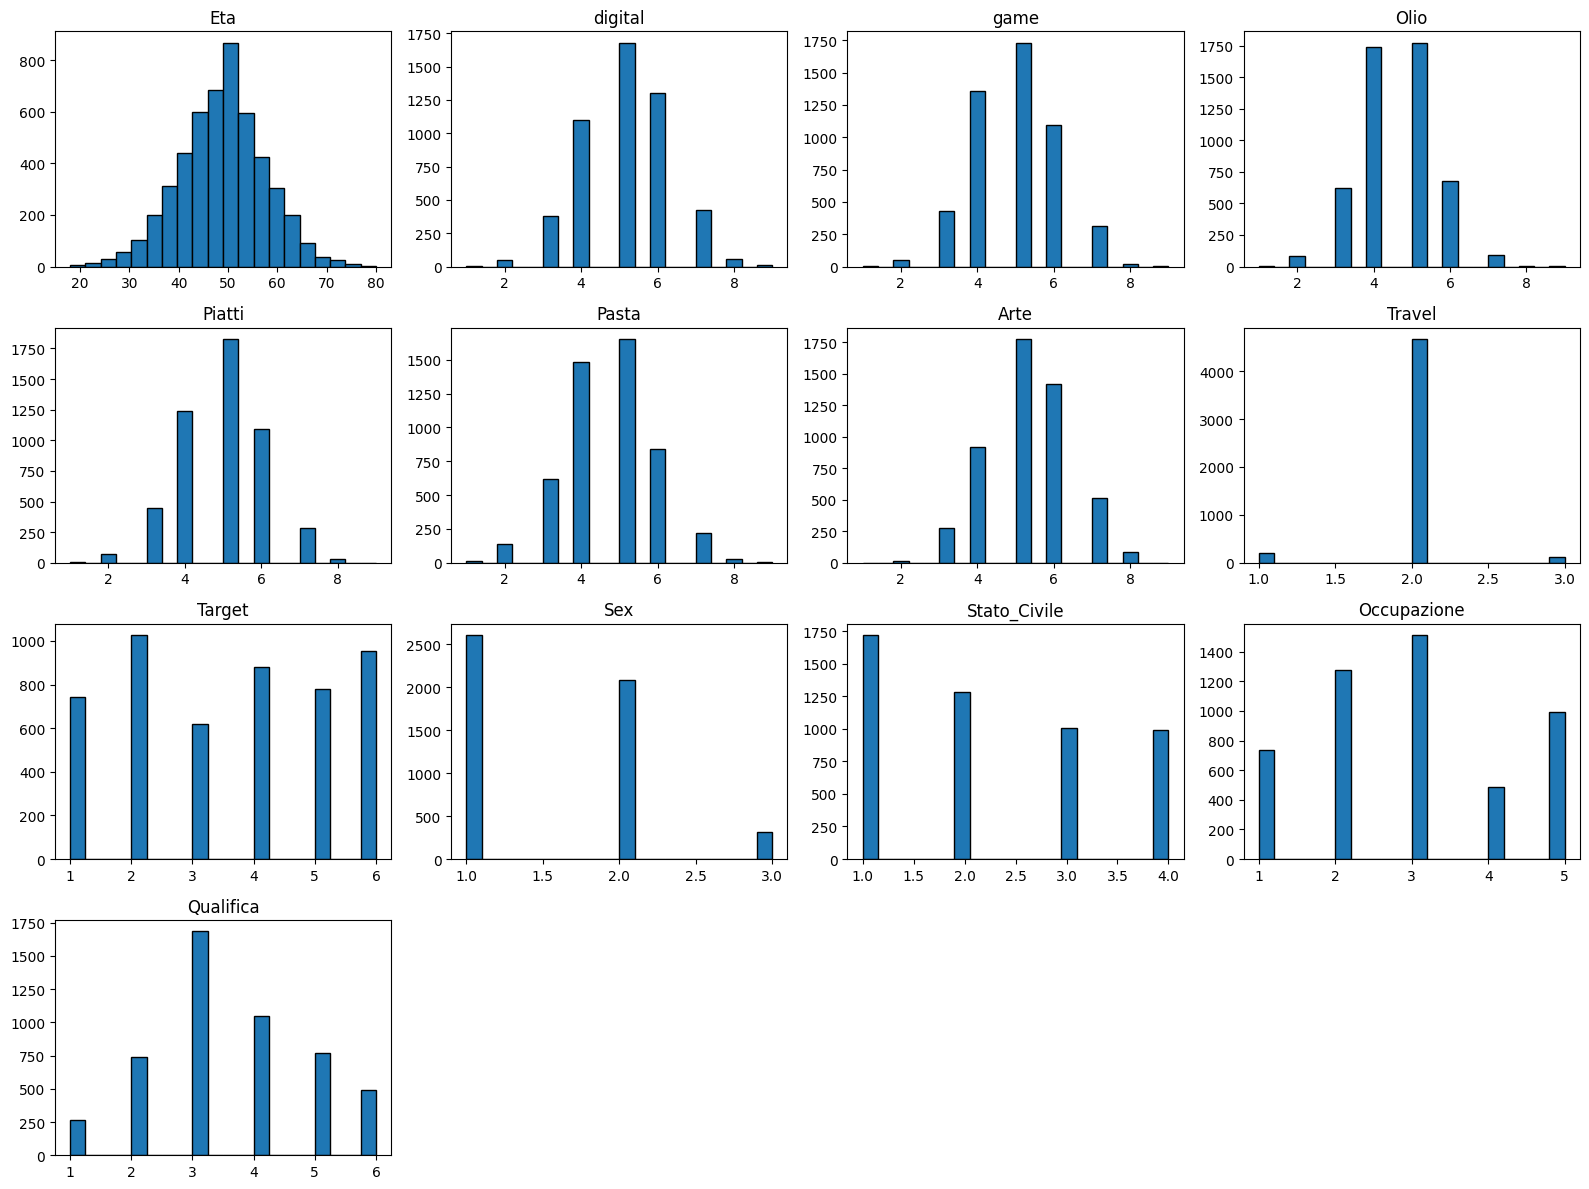

In [2]:
# --- Plots ---
# 1D Histograms
plt.figure(figsize=(16, 12))
for i, col in enumerate(data.columns):
    plt.subplot(4, 4, i+1)
    plt.hist(data[col], bins=20, edgecolor='black')
    plt.title(col)
plt.tight_layout()
plt.show()
plt.savefig('/content/drive/My Drive/Colab Notebooks/1D_histograms_quest_v3.png')
plt.close()

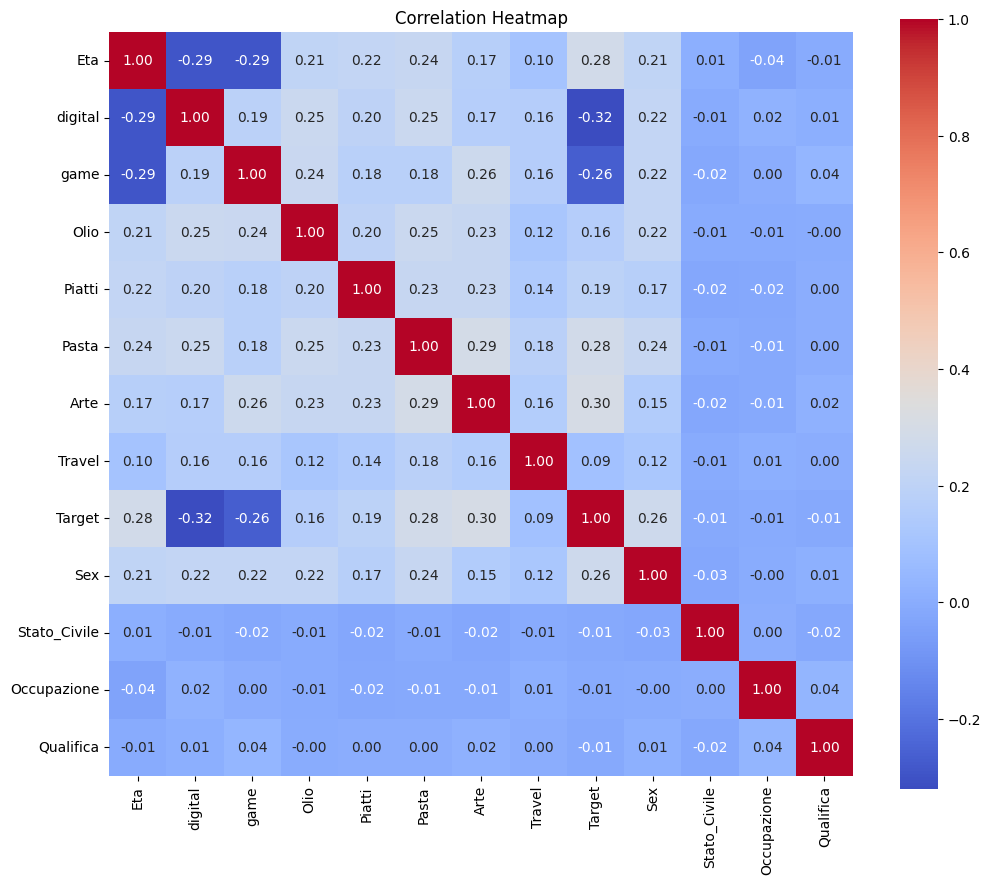

In [3]:
# 2D Correlation heatmap
plt.figure(figsize=(12, 10))
corr = data.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()
plt.savefig('/content/drive/My Drive/Colab Notebooks/correlation_heatmap_quest_v3.png')
plt.close()

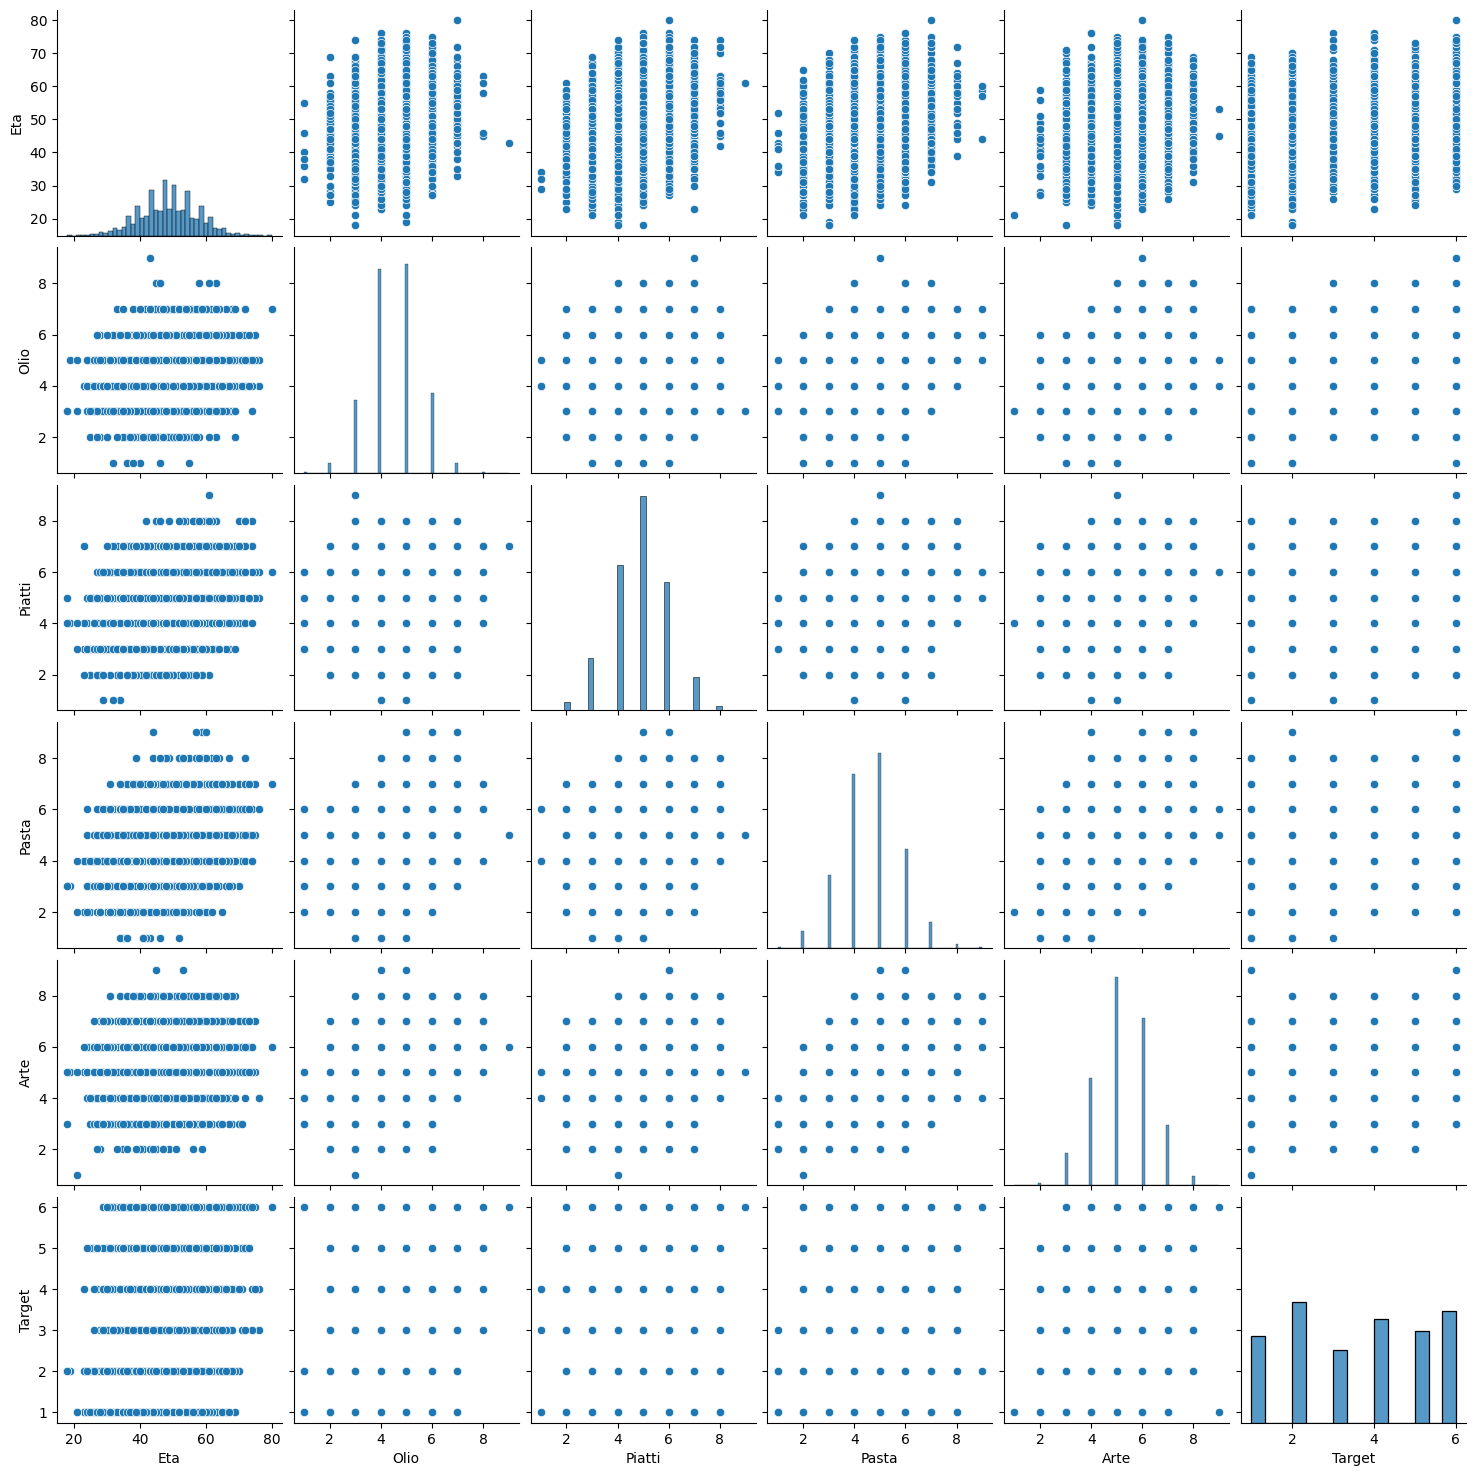

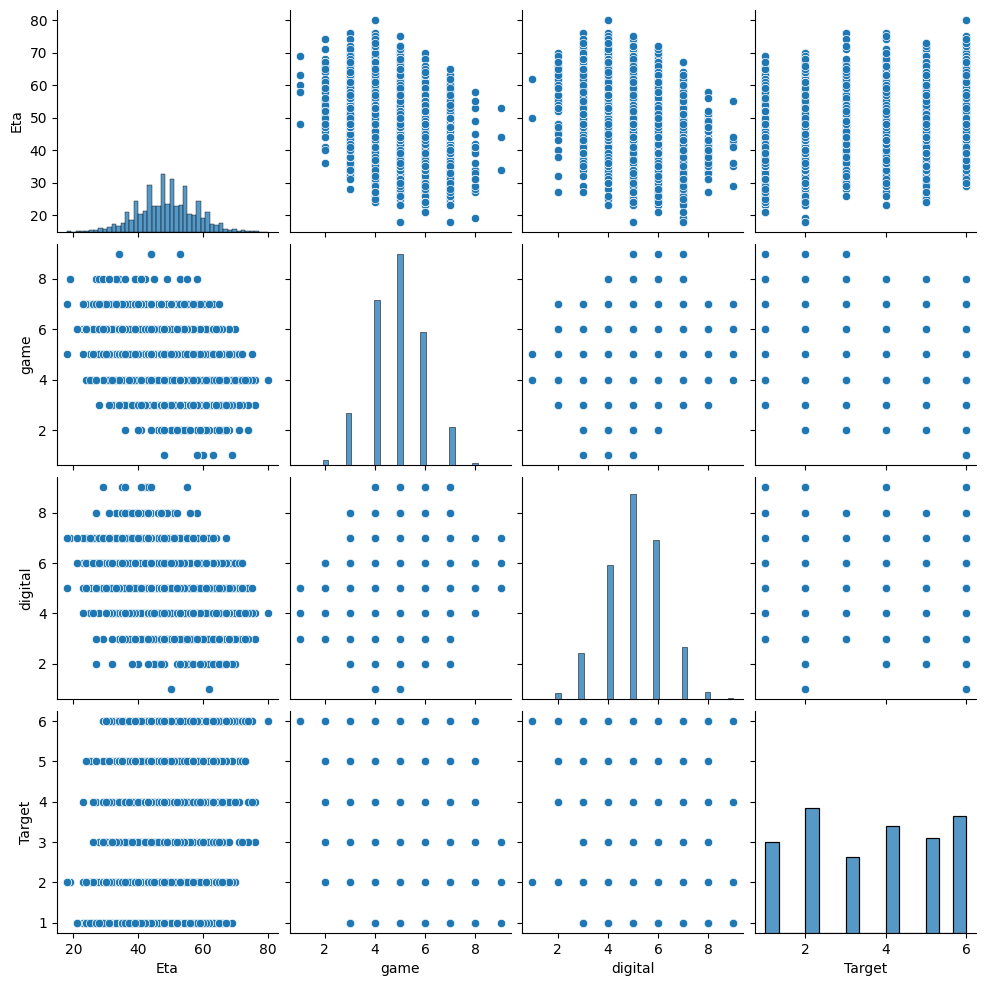

In [4]:
# Focused 2D pairplot on correlated variables
correlated_vars = ['Eta', 'Olio', 'Piatti', 'Pasta', 'Arte', 'Target']
#'Travel', 'Occupazione', 'Stato_Civile',
sns.pairplot(data[correlated_vars])
plt.show()
plt.savefig('/content/drive/My Drive/Colab Notebooks/pairplot_correlated_vars_quest_v3.png')
plt.close()

# Focused 2D pairplot on correlated variables
correlated_vars = ['Eta', 'game', 'digital','Target']
sns.pairplot(data[correlated_vars])
plt.show()
plt.savefig('/content/drive/My Drive/Colab Notebooks/pairplot_correlated_vars_quest_v3.png')
plt.close()

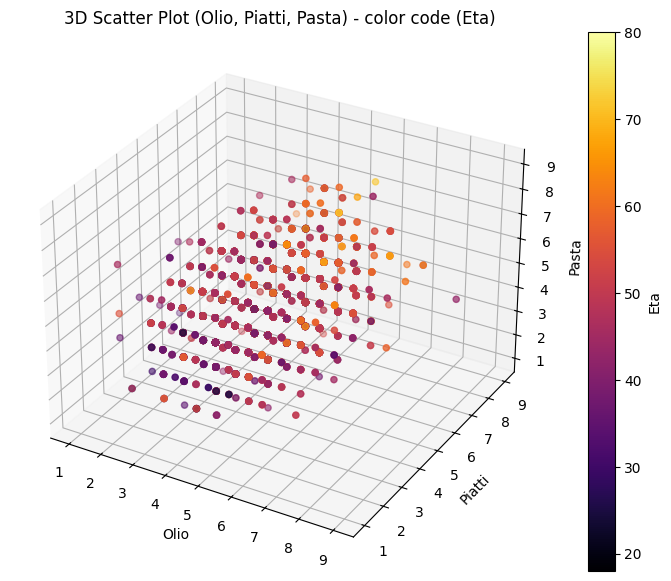

In [13]:
# 3D Scatter plot of 3 correlated variables
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc=ax.scatter3D(data['Olio'], data['Piatti'], data['Pasta'], c=data['Eta'], cmap='inferno')
plt.colorbar(sc, ax=ax, label='Eta')
ax.set_xlabel('Olio')
ax.set_ylabel('Piatti')
ax.set_zlabel('Pasta')
ax.set_title('3D Scatter Plot (Olio, Piatti, Pasta) - color code (Eta)')
plt.show()
plt.savefig('/content/drive/My Drive/Colab Notebooks/3D_scatter_plot_quest_v3.png')
plt.close()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, rankdata
from sklearn.datasets import make_spd_matrix
from mpl_toolkits.mplot3d import Axes3D

from google.colab import drive
drive.mount('/content/drive')

# Load the CSV file
file_path = '/content/drive/My Drive/Colab Notebooks/simulated_discrete_variables_complete_quest_SexCorrelated.csv'  # Replace with your actual path
df = pd.read_csv(file_path)

# Check column names
print("Available columns:", df.columns)

# Filter rows where the 'sex' column is equal to 1
filtered_df = df[df['Sex'] == 3]

# Show the filtered data
print("Filtered data (Sex == 3):")
print(filtered_df)

# Optional: Save to a new CSV file
filtered_df.to_csv('/content/drive/My Drive/Colab Notebooks/filtered_sex_3.csv', index=False)

Mounted at /content/drive
Available columns: Index(['Eta', 'digital', 'game', 'Olio', 'Piatti', 'Pasta', 'Arte', 'Travel',
       'Target', 'Sex', 'Stato_Civile', 'Occupazione', 'Qualifica'],
      dtype='object')
Filtered data (Sex == 3):
      Eta  digital  game  Olio  Piatti  Pasta  Arte  Travel  Target  Sex  \
13     46        7     7     4       6      7     6       2       4    3   
16     67        7     5     5       7      5     7       3       3    3   
17     52        4     4     5       3      5     4       2       6    3   
31     50        4     6     5       5      5     4       2       5    3   
34     64        7     4     5       5      6     6       3       5    3   
...   ...      ...   ...   ...     ...    ...   ...     ...     ...  ...   
4939   63        4     5     5       5      6     6       2       6    3   
4942   47        5     6     5       5      5     8       2       6    3   
4959   44        6     5     4       4      6     5       2       5    3   


In [1]:
!pip install minisom
!pip install pandas
!pip install xlrd

import numpy
import pandas
import xlrd
import pandas as pd
from sklearn.model_selection import train_test_split
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
#from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
import pickle

from google.colab import drive
drive.mount('/content/drive')

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=992342374f6dd7b2acaa5921c51478a0bf7231476c3edd09dc57bd28dc839ff0
  Stored in directory: /root/.cache/pip/wheels/19/db/95/5e53bc2b88a328217fdf9f2886cafbe86b0df274f4b601f572
Successfully built minisom
Mounted at /content/drive


In [6]:
# --- Load the data ---
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Simul_quest_TeCHe_5000_1_9.csv')
#simulated_discrete_variables_complete_quest_SexCorrelated.csv')
df = dataset

# Assume you have a target column called 'label' (adapt if different)
# Separate features and labels
#X = df.drop(columns=['Target','Travel','Stato_Civile','Occupazione','Qualifica']).select_dtypes(include=[np.number]).values
y = df['overall'].values
X = df.drop(columns=['overall']).select_dtypes(include=[np.number]).values


# --- Normalize features ---
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# --- Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Initialize and train the SOM ---

data_teche = X_train
data = data_teche

SOM_X_AXIS_NODES  = 18
SOM_Y_AXIS_NODES  = 18
som_size = 18
SOM_N_VARIABLES  = X_train.shape[1]

ALPHA = 0.5
DECAY_FUNC = 'asymptotic_decay'
#'asymptotic_decay'
#'linear_decay_to_zero'
SIGMA0 = 6
SIGMA_DECAY_FUNC = 'asymptotic_decay'
NEIGHBORHOOD_FUNC = 'bubble'
#'mexican_hat'
#'gaussian'
#'triangle'
DISTANCE_FUNC = 'cosine'
#'manhattan'
#'euclidean'
TOPOLOGY = 'rectangular'
#'hexagonal'
#
RANDOM_SEED = 10

som = MiniSom(
        SOM_X_AXIS_NODES,
        SOM_Y_AXIS_NODES,
        SOM_N_VARIABLES,
        sigma=SIGMA0,
        learning_rate=ALPHA,
        neighborhood_function=NEIGHBORHOOD_FUNC,
        activation_distance=DISTANCE_FUNC,
        topology=TOPOLOGY,
        sigma_decay_function = SIGMA_DECAY_FUNC,
        decay_function = DECAY_FUNC,
        random_seed=RANDOM_SEED,
        )

#som.pca_weights_init(data)
som.random_weights_init(X_train)


In [8]:
N_ITERATIONS = 10000

# Train the SOM
print("Training SOM...")
#som.train_random(X_train, N_ITERATIONS, verbose=True)
som.train_batch(X_train, N_ITERATIONS, verbose=True)
print("Training completed.")

# saving the som in the file som.p
with open('/content/drive/My Drive/Colab Notebooks/som_complete.p', 'wb') as outfile:
    pickle.dump(som, outfile)
    print("SOM saved to '/content/drive/My Drive/Colab Notebooks/som_complete.p'")
    outfile.close()
    print("File closed")


with open('/content/drive/My Drive/Colab Notebooks/som_complete.p', 'rb') as infile:
    som = pickle.load(infile)


# --- Map training data to SOM nodes ---
win_map = som.win_map(X_train)

# --- Assign labels to SOM nodes ---
labels_map = {}
for position in win_map.keys():
    labels = [y_train[i] for i, x in enumerate(X_train) if (som.winner(x) == position)]
    if labels:  # Only if there are samples mapped to this node
        most_common = Counter(labels).most_common(1)[0][0]
        labels_map[position] = most_common

# --- Predict train samples ---
y_pred_train = []

for sample in X_train:
    winner = som.winner(sample)
    label = labels_map.get(winner, -1)  # -1 if node was empty during training
    y_pred_train.append(label)

y_pred_train = np.array(y_pred_train)


# --- Predict test samples ---
y_pred = []

for sample in X_test:
    winner = som.winner(sample)
    label = labels_map.get(winner, -1)  # -1 if node was empty during training
    y_pred.append(label)

y_pred = np.array(y_pred)

# --- Evaluate accuracy ---
from sklearn.metrics import accuracy_score, confusion_matrix

# Remove predictions where no label was assigned (-1)
mask = y_pred != -1
y_test_masked = y_test[mask]
y_pred_masked = y_pred[mask]

accuracy = accuracy_score(y_test_masked, y_pred_masked)

print(f"Classification accuracy on test set: {accuracy:.2f}")

# Confusion matrix
cm = confusion_matrix(y_test_masked, y_pred_masked)

print("Confusion Matrix:")
print(cm)





Training SOM...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 1.280706709931193
Training completed.
SOM saved to '/content/drive/My Drive/Colab Notebooks/som_complete.p'
File closed
Classification accuracy on test set: 0.34
Confusion Matrix:
[[  0   0   0   1   0   1   0   0]
 [  0   0   0   3   0   0   0   0]
 [  0   0   2  29  35   5   0   0]
 [  0   1   5  88 187  28   4   0]
 [  0   0   5 106 231  36   2   0]
 [  0   0   2  46 131  23   1   0]
 [  0   0   0   8  15   2   0   0]
 [  0   0   0   1   1   0   0   0]]


**Useful functions**

Functions to normalise data, to performe Euclidean and Manhattan distance, to evaluate Learning rate and neighbourhood range calculation as a function of the number of steps are defined.
One of the most important function is **winning_neuron**:

*   **winning_neuron** searches the Best Matching Unit (BMU) for the sample data t. The distance between the input signal and every neuron in the map layer is calculated and the row and column index of the grid of the neuron with the shortest distance is returned.


In [18]:
# Useful functions

# Data Normalisation
def minmax_scaler(data):
  scaler = MinMaxScaler()
  scaled = scaler.fit_transform(data)
  return scaled

# Euclidean distance
def e_distance(x,y):
  return distance.euclidean(x,y)

# Manhattan distance
def m_distance(x,y):
  return distance.cityblock(x,y)

# Best Matching Unit search
def winning_neuron(data, t, som, num_rows, num_cols):
  winner = [0,0]
  shortest_distance = np.sqrt(data.shape[1]) # initialise with max distance
  input_data = data[t]
  for row in range(num_rows):
    for col in range(num_cols):
      distance = e_distance(som[row][col], data[t])
      if distance < shortest_distance:
        shortest_distance = distance
        winner = [row,col]
  return winner

# Learning rate and neighbourhood range calculation
def decay(step, max_steps,max_learning_rate,max_m_dsitance):
  coefficient = 1.0 - (np.float64(step)/max_steps)
  learning_rate = coefficient*max_learning_rate
  neighbourhood_range = ceil(coefficient * max_m_dsitance)
  return learning_rate, neighbourhood_range

In [59]:
import numpy as np
from numpy.ma.core import ceil
from scipy.spatial import distance #distance calculation
from sklearn.preprocessing import MinMaxScaler #normalisation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score #scoring
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import animation, colors

# --- Load the data ---
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/simulated_discrete_variables_complete_quest_SexCorrelated.csv')
df = dataset

# Assume you have a target column called 'label' (adapt if different)
# Separate features and labels
X = df.drop(columns=['Target','Stato_Civile','Occupazione','Qualifica']).select_dtypes(include=[np.number]).values
#X = df.drop(columns=['Target']).select_dtypes(include=[np.number]).values
y = df['Target'].values

# train and test split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape) # check the shapes

# hyperparameters
num_rows = 19
num_cols = 19
max_m_dsitance = 4
max_learning_rate = 0.5
max_steps = int(2000)
                #*10e2)
neighbourhood_range_v=[]
steps = []
rate= []
num_neurons = 5*np.sqrt(train_x.shape[0])
grid_size = ceil(np.sqrt(num_neurons))
print('Optimal Number of neurons',num_neurons)
print('Optimal Grid Size',grid_size*grid_size)
print('Choosen Grid Size',num_rows*num_cols)
print('Maximum number of steps',max_steps)

train_x_norm = minmax_scaler(train_x) # normalisation

# initialising self-organising map
num_dims = train_x_norm.shape[1] # numnber of dimensions in the input data
np.random.seed(40)
som = np.random.random_sample(size=(num_rows, num_cols, num_dims)) # map construction

# start training iterations
for step in range(max_steps):
  if (step+1) % 10000 == 0:
    print("Iteration: ", step+1) # print out the current iteration for every 1k
  learning_rate, neighbourhood_range = decay(step, max_steps,max_learning_rate,max_m_dsitance)
  neighbourhood_range_v.append(neighbourhood_range)
  steps.append(step)
  rate.append(learning_rate)
  t = np.random.randint(0,high=train_x_norm.shape[0]) # random index of traing data
  winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
  for row in range(num_rows):
    for col in range(num_cols):
      if m_distance([row,col],winner) <= neighbourhood_range:
        som[row][col] += learning_rate*(train_x_norm[t]-som[row][col]) #update neighbour's weight

print("SOM training completed")



(4000, 9) (4000,) (1000, 9) (1000,)
Optimal Number of neurons 316.2277660168379
Optimal Grid Size 324.0
Choosen Grid Size 361
Maximum number of steps 2000000
Iteration:  10000
Iteration:  20000
Iteration:  30000
Iteration:  40000
Iteration:  50000
Iteration:  60000
Iteration:  70000
Iteration:  80000
Iteration:  90000
Iteration:  100000
Iteration:  110000
Iteration:  120000
Iteration:  130000
Iteration:  140000
Iteration:  150000
Iteration:  160000
Iteration:  170000
Iteration:  180000
Iteration:  190000
Iteration:  200000
Iteration:  210000
Iteration:  220000
Iteration:  230000
Iteration:  240000
Iteration:  250000
Iteration:  260000
Iteration:  270000
Iteration:  280000
Iteration:  290000
Iteration:  300000
Iteration:  310000
Iteration:  320000
Iteration:  330000
Iteration:  340000
Iteration:  350000
Iteration:  360000
Iteration:  370000
Iteration:  380000
Iteration:  390000
Iteration:  400000
Iteration:  410000
Iteration:  420000
Iteration:  430000
Iteration:  440000
Iteration:  450

In [5]:
# saving the som in the file som.p
with open('/content/drive/My Drive/Colab Notebooks/som_19x19_Steps2M_dsitance4_LR_0p5.p', 'wb') as outfile:
    pickle.dump(som, outfile)
    print("SOM saved to 'som_19x19_Steps2M_dsitance4_LR_0p5.p'")
    outfile.close()
    print("File closed")


with open('/content/drive/My Drive/Colab Notebooks/som_19x19_Steps2M_dsitance4_LR_0p5.p', 'rb') as infile:
    som = pickle.load(infile)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab Notebooks/som_19x19_Steps2M_dsitance4_LR_0p5.p'

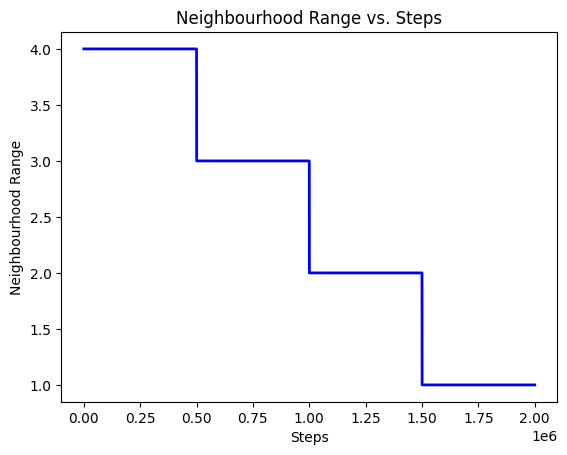

In [65]:
## plot Neighbourhood Range vs. Steps
#Plotting the CDF
plt.plot(steps, neighbourhood_range_v, color='blue', linewidth=2, markersize=2)
plt.xlabel('Steps')
plt.ylabel('Neighbourhood Range')
plt.title("Neighbourhood Range vs. Steps")
plt.show()

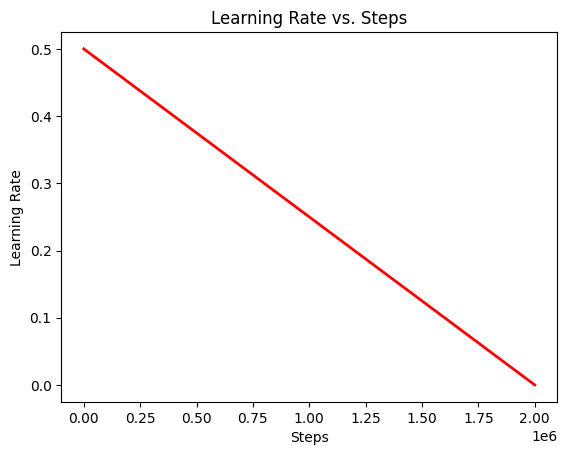

In [66]:
## plot Learing Rate vs. Steps
#Plotting the CDF
plt.plot(steps, rate, color='red', linewidth=2, markersize=2)
plt.xlabel('Steps')
plt.ylabel('Learning Rate')
plt.title("Learning Rate vs. Steps")
plt.show()

**Constructing a label map**

Because SOM uses unsupervised learning there are no feedback on the final answers. But the simulated dataset have been created with a Target variable to have a check on the SOM clusterization accuracy.

We create the same grid as the SOM. For each training data, we search the winning neuron and add the label of the observation to the list for each Best Matching Unit (BMU).

To construct a label map, we assign a single label to each neuron on the map by majority voting.


sample data:  1000
BMU index [11, 4]
sample data:  2000
BMU index [15, 18]
sample data:  3000
BMU index [11, 10]
sample data:  4000
BMU index [1, 16]


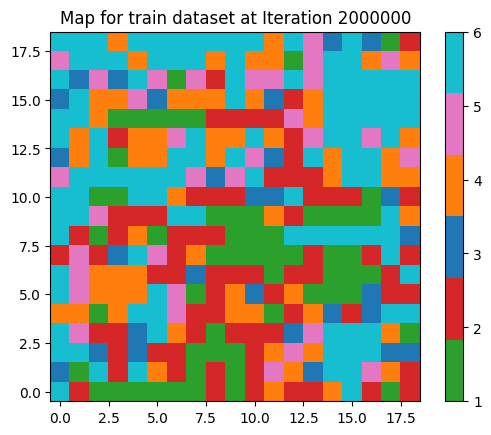

In [69]:
# collecting labels

label_data = train_y
map = np.empty(shape=(num_rows, num_cols), dtype=object)

for row in range(num_rows):
  for col in range(num_cols):
    map[row][col] = [] # empty list to store the label

for t in range(train_x_norm.shape[0]):
  if (t+1) % 1000 == 0:
    print("sample data: ", t+1)
  winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
  if (t+1) % 1000 == 0:
    print('BMU index', winner)
  map[winner[0]][winner[1]].append(label_data[t]) # label of winning neuron

# construct label map
label_map = np.zeros(shape=(num_rows, num_cols),dtype=np.int64)
for row in range(num_rows):
  for col in range(num_cols):
    label_list = map[row][col]
    if len(label_list)==0:
      label = 6
    else:
      label = max(label_list, key=label_list.count)
    label_map[row][col] = label

title = ('Map for train dataset at Iteration ' + str(max_steps))
cmap = colors.ListedColormap(['tab:green', 'tab:red', 'tab:blue', 'tab:orange','tab:pink','tab:cyan'])
    #['tab:green', 'tab:red', 'tab:orange','tab:blue','tab:purple','tab:gray','tab:olive','tab:cyan','tab:pink','tab:brown'])
#'plasma'
#colors.ListedColormap([1, 2, 5, 6, 9, 10])
    #['tab:green', 'tab:red', 'tab:orange','tab:blue','tab:'])
plt.imshow(label_map, origin='lower', cmap=cmap)
plt.colorbar()
plt.title(title)
plt.show()

sample data:  1000
BMU index [15, 14]


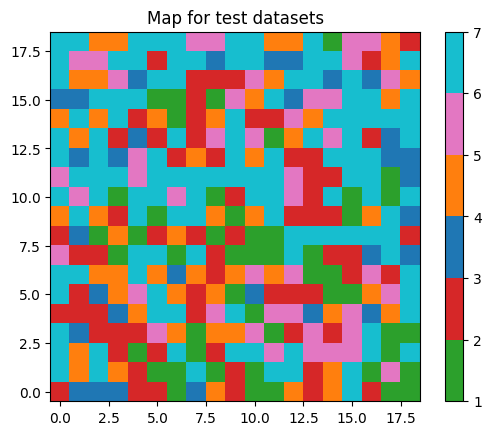

In [70]:
# test data

# collecting labels

label_data = test_y
data = minmax_scaler(test_x) # normalisation
test_x_norm = minmax_scaler(test_x) # normalisation

map = np.empty(shape=(num_rows, num_cols), dtype=object)

for row in range(num_rows):
  for col in range(num_cols):
    map[row][col] = [] # empty list to store the label

for t in range(test_x_norm.shape[0]):
  if (t+1) % 1000 == 0:
    print("sample data: ", t+1)
  winner = winning_neuron(test_x_norm, t, som, num_rows, num_cols)
  if (t+1) % 1000 == 0:
    print('BMU index', winner)
  map[winner[0]][winner[1]].append(label_data[t]) # label of winning neuron

# construct label map
label_map = np.zeros(shape=(num_rows, num_cols),dtype=np.int64)
for row in range(num_rows):
  for col in range(num_cols):
    label_list = map[row][col]
    if len(label_list)==0:
      label = 7
    else:
      label = max(label_list, key=label_list.count)
    label_map[row][col] = label

title = ('Map for test datasets')
cmap = colors.ListedColormap(['tab:green', 'tab:red', 'tab:blue', 'tab:orange','tab:pink','tab:cyan'])
plt.imshow(label_map, origin='lower', cmap=cmap)
plt.colorbar()
plt.title(title)
plt.show()

In [71]:
# Accuracy evaluation
# using the trained som, search the winning node of corresponding to the test data
# get the label of the winning node

winner_labels = []

for t in range(data.shape[0]):
 winner = winning_neuron(data, t, som, num_rows, num_cols)
 row = winner[0]
 col = winner[1]
 predicted = label_map[row][col]
 winner_labels.append(predicted)

print("Accuracy: ",accuracy_score(test_y, np.array(winner_labels)))

Accuracy:  0.528


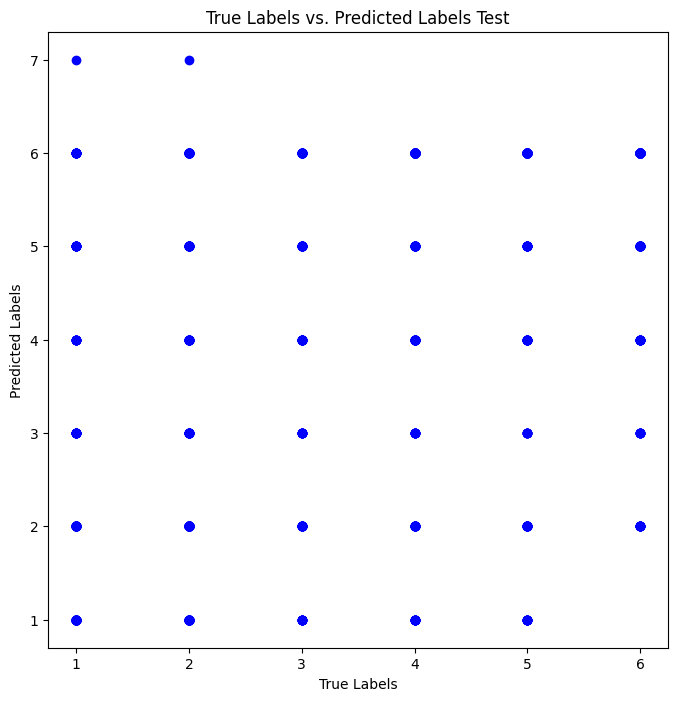

In [58]:
# --- Plot True Labels vs. Predicted Labels Test ---
plt.figure(figsize=(8, 8))
plt.scatter(test_y, np.array(winner_labels), c='blue', marker='o')
#plt.scatter(y_train, y_pred_train, c='red', marker='^')
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('True Labels vs. Predicted Labels Test')
plt.show()
#

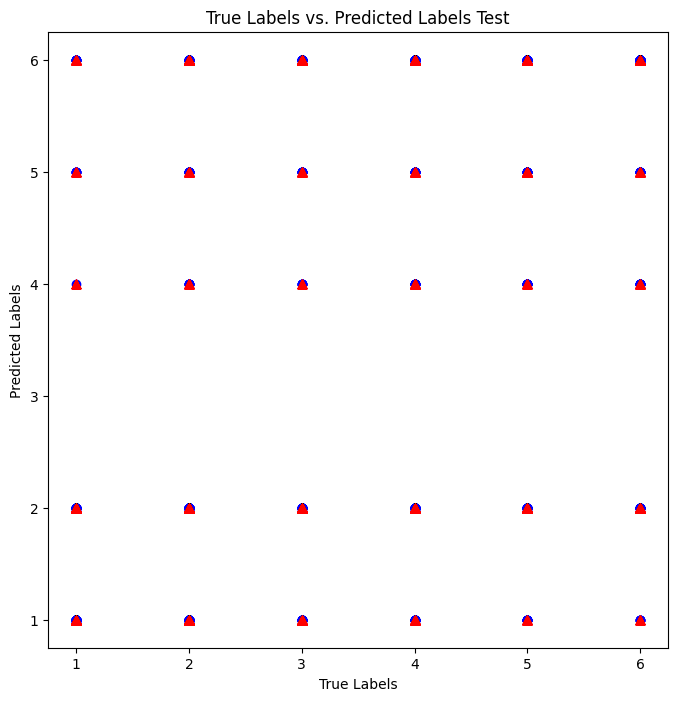

In [39]:
# --- Plot True Labels vs. Predicted Labels Test ---
plt.figure(figsize=(8, 8))
plt.scatter(y_test_masked, y_pred_masked, c='blue', marker='o')
plt.scatter(y_train, y_pred_train, c='red', marker='^')
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('True Labels vs. Predicted Labels Test')
plt.show()
#

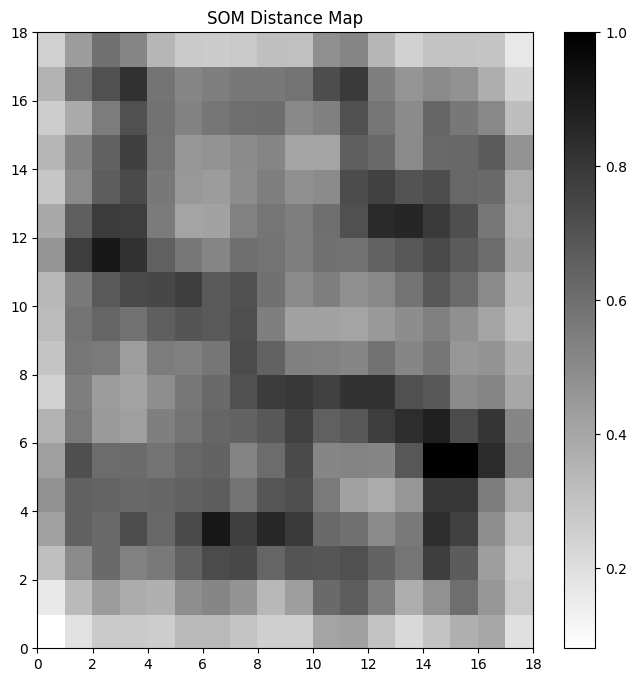

In [10]:

# --- Plot SOM distance map ---
# --- Visualize the SOM weight map ---
# create the grid
plt.figure(figsize=(8, 8))
#plot the distance map
plt.pcolor(som.distance_map().T, cmap='gist_yarg')
#           'gist_yarg')
# show the color bar
plt.colorbar()
plt.title('SOM Distance Map')
plt.savefig('/content/drive/My Drive/Colab Notebooks/som_distance_map_complete.png')  # Save the plot
plt.show()

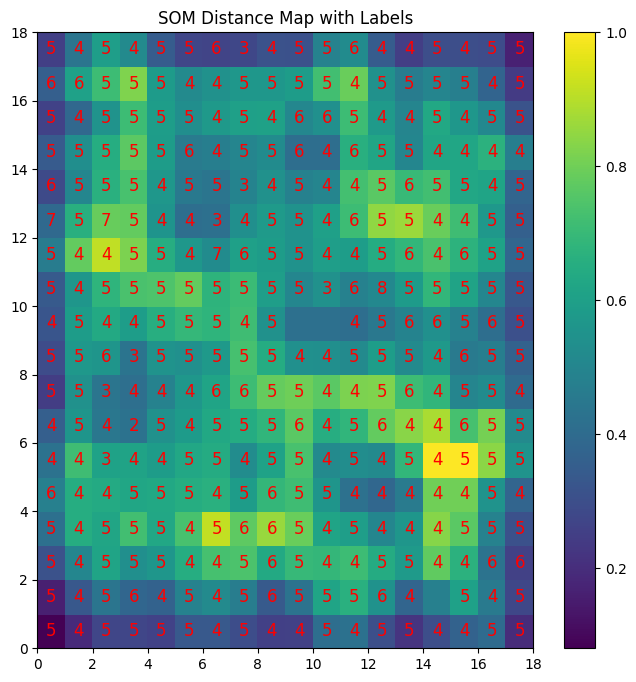

In [11]:

# --- Visualize the SOM weight map and labels on the map---
plt.figure(figsize=(8, 8))
plt.pcolor(som.distance_map().T, cmap='viridis')  # Distance map
plt.colorbar()
plt.title('SOM Distance Map with Labels')

# Plot labels on the map
for position, label in labels_map.items():
    plt.text(position[0] + 0.5, position[1] + 0.5, str(label),
             color='red', fontsize=12, ha='center', va='center')

plt.savefig('/content/drive/My Drive/Colab Notebooks/som_labelled_map_complete.png')
plt.show()

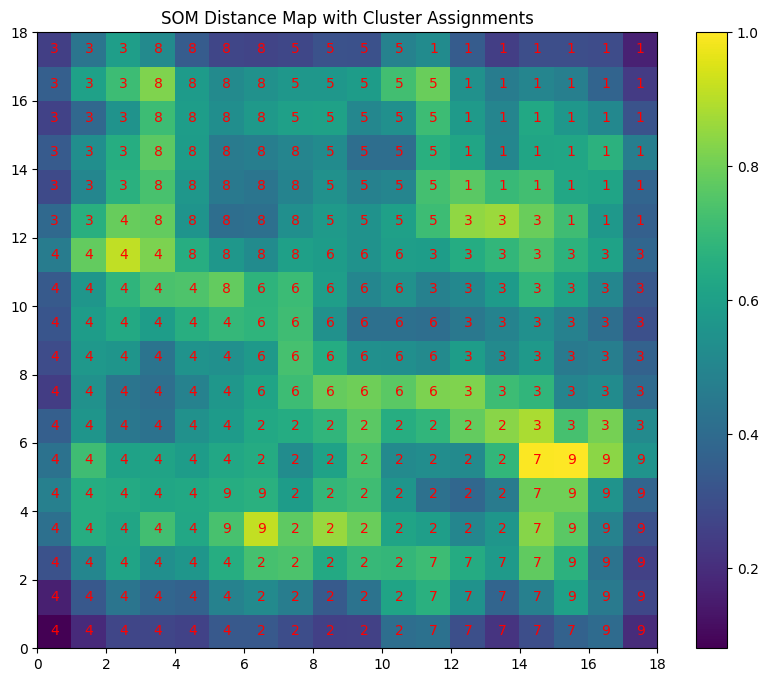

In [27]:
from sklearn.cluster import KMeans

# --- Create the U-Matrix (distance map) ---
u_matrix = som.distance_map().T

# --- Flatten the U-Matrix to cluster the SOM neurons ---
neurons = som.get_weights().reshape(-1, X.shape[1])

# --- Apply clustering to neurons ---
n_clusters = 9  # You can choose the number of clusters you want
kmeans = KMeans(n_clusters=n_clusters, random_state=10)
kmeans.fit(neurons)
clusters = kmeans.labels_+1

# --- Plot the U-Matrix and cluster assignment ---
plt.figure(figsize=(10, 8))
plt.pcolor(u_matrix, cmap='viridis')
plt.colorbar()
plt.title('SOM Distance Map with Cluster Assignments')
som_size =  SOM_X_AXIS_NODES
# Plot cluster numbers on SOM grid
for i, cluster in enumerate(clusters):
    x = i // som_size
    y = i % som_size
    plt.text(x + 0.5, y + 0.5, str(cluster),
             color='red', fontsize=10, ha='center', va='center')

#plt.savefig('som_clusters.png')
plt.show()

# --- 8. Assign each sample in X to a cluster ---
sample_clusters = []

for x in X:
    winner = som.winner(x)
    neuron_index = winner[0] * som_size + winner[1]
    sample_clusters.append(clusters[neuron_index])

# Save cluster assignments
#output_df = df.copy()
#output_df['KMeans_cluster'] = sample_clusters
#output_df.to_csv('/content/drive/My Drive/Colab Notebooks/clustered_data_complete.csv', index=False)

#print("Clustered data saved to 'clustered_data_complete.csv'.")


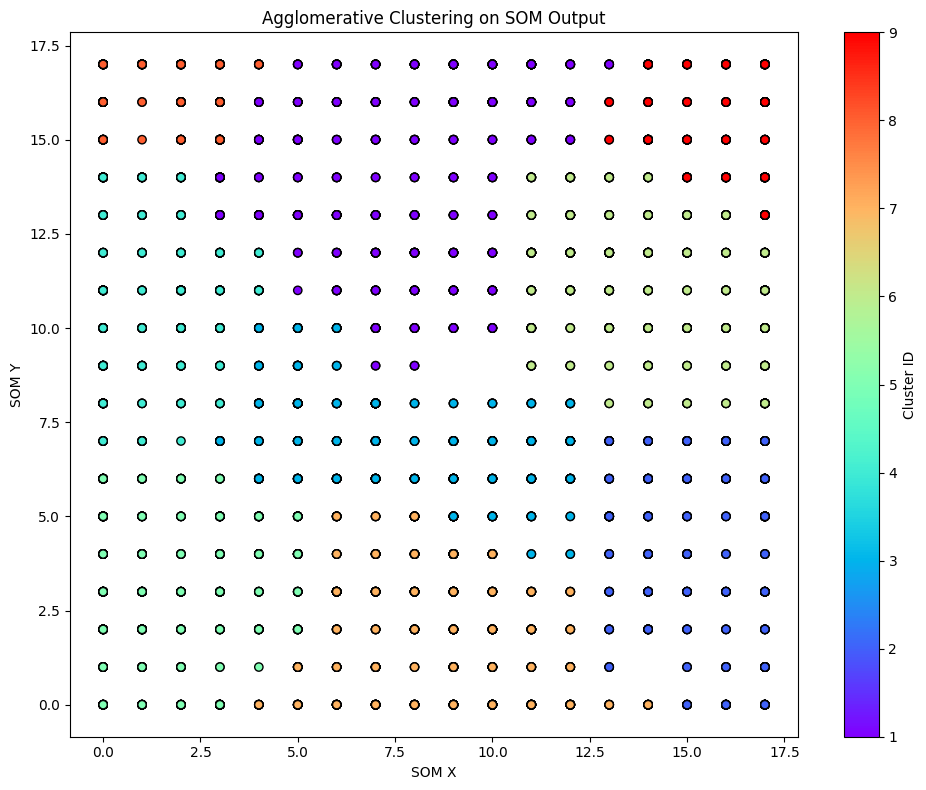

Clustered data saved to 'clustered_data_complete_v2.csv'.


In [28]:
# Map data to SOM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Map data to SOM
data_scaled = X_train
mapped_data = np.array([som.winner(x) for x in data_scaled])

# Convert 2D SOM coordinates to 1D for clustering
mapped_data_1d = [x[0]*10 + x[1] for x in mapped_data]


agglo = AgglomerativeClustering(n_clusters=9)
clusters_agglo = agglo.fit_predict(mapped_data)+1


# Plot DBSCAN results
plt.figure(figsize=(10, 8))

scatter2 = plt.scatter(mapped_data[:, 0], mapped_data[:, 1], c=clusters_agglo, cmap='rainbow', edgecolor='k')
plt.title("Agglomerative Clustering on SOM Output")
plt.xlabel("SOM X")
plt.ylabel("SOM Y")
plt.colorbar(scatter2, label="Cluster ID")

plt.tight_layout()
plt.show()

# --- 8. Assign each sample in X to a cluster ---
sample_clusters_agglo = []

for x in X:
    winner = som.winner(x)
    neuron_index = winner[0] * som_size + winner[1]
    sample_clusters_agglo.append(clusters_agglo[neuron_index])

output_df = df.copy()
output_df['KMeans_cluster'] = sample_clusters
output_df['AC_cluster'] = sample_clusters_agglo
output_df.to_csv('/content/drive/My Drive/Colab Notebooks/clustered_data_complete_v2.csv', index=False)

print("Clustered data saved to 'clustered_data_complete_v2.csv'.")


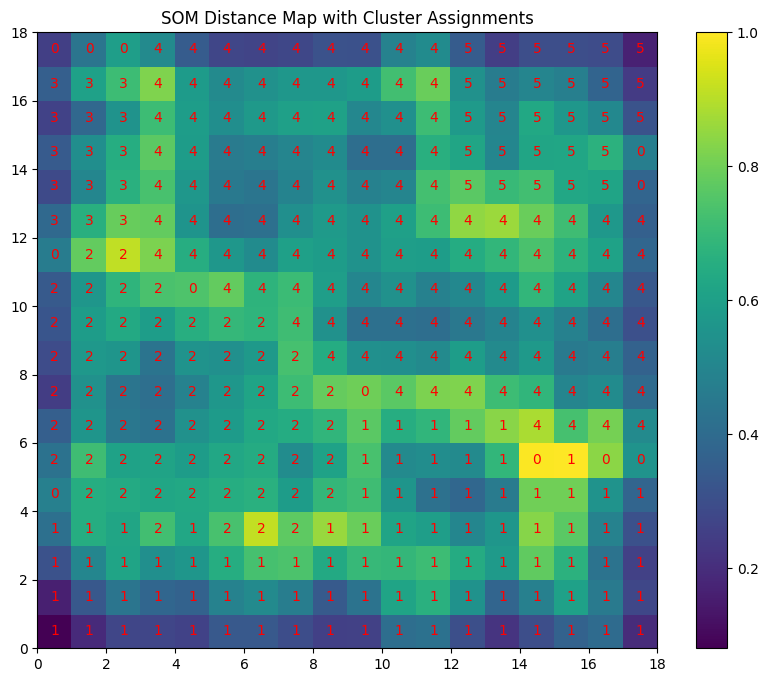

Clustered data saved to 'clustered_data_DBSCAN.csv'.


In [18]:
from sklearn.cluster import DBSCAN


# --- Create the U-Matrix (distance map) ---
u_matrix = som.distance_map().T

# --- Flatten the U-Matrix to cluster the SOM neurons ---
neurons = som.get_weights().reshape(-1, X.shape[1])

# --- Apply clustering to neurons ---

db = DBSCAN(eps=0.5, min_samples=9)
labels = db.fit_predict(neurons)
clusters = labels+1

# --- Plot the U-Matrix and cluster assignment ---
plt.figure(figsize=(10, 8))
plt.pcolor(u_matrix, cmap='viridis')
plt.colorbar()
plt.title('SOM Distance Map with Cluster Assignments')
som_size =  SOM_X_AXIS_NODES
# Plot cluster numbers on SOM grid
for i, cluster in enumerate(clusters):
    x = i // som_size
    y = i % som_size
    plt.text(x + 0.5, y + 0.5, str(cluster),
             color='red', fontsize=10, ha='center', va='center')

#plt.savefig('som_clusters.png')
plt.show()

# --- 8. Assign each sample in X to a cluster ---
sample_clusters = []

for x in X:
    winner = som.winner(x)
    neuron_index = winner[0] * som_size + winner[1]
    sample_clusters.append(clusters[neuron_index])

# Save cluster assignments
#output_df = df.copy()
#output_df['cluster'] = sample_clusters
#output_df.to_csv('/content/drive/My Drive/Colab Notebooks/clustered_data_DBSCAN.csv', index=False)

print("Clustered data saved to 'clustered_data_DBSCAN.csv'.")


In [43]:
!pip install plotly
!pip install -U kaleido
import plotly.graph_objs as go
import plotly.io as pio
from plotly.validators.scatter.marker import SymbolValidator

# --- Map each sample to a neuron and assign its cluster ---
sample_coords = np.array([som.winner(x) for x in X])
sample_indices = np.array([coord[0] * som_size + coord[1] for coord in sample_coords])
sample_clusters = clusters[sample_indices]


# --- 3D Plot with plotly ---
x = np.arange(0, som_size)
y = np.arange(0, som_size)
x, y = np.meshgrid(x, y)

fig = go.Figure()

# Surface plot for U-Matrix
fig.add_trace(go.Surface(
    z=u_matrix,
    x=x,
    y=y,
    colorscale='Viridis',
    opacity=0.8,
    showscale=True,
    colorbar=dict(title="Distance")
))

# Color map for clusters
color_map = ['red', 'blue', 'green', 'orange', 'purple', 'cyan']
# Symbols and color map for clusters
symbol_map = ['circle', 'square', 'diamond', 'x'     , 'circle-open', 'diamond-open']

# --- 7. Create 3D Plot ---
x = np.arange(0, som_size)
y = np.arange(0, som_size)
x, y = np.meshgrid(x, y)

fig = go.Figure()

# Plot U-Matrix surface
fig.add_trace(go.Surface(
    z=u_matrix,
    x=x,
    y=y,
    colorscale='Viridis',
    opacity=0.8,
    showscale=True,
    colorbar=dict(title="Distance")
))



# Plot samples with different symbols per cluster
for idx, (coord, cluster_label) in enumerate(zip(sample_coords, sample_clusters)):
    xi, yi = coord
    zi = u_matrix[xi, yi]
    hover_text = f"Sample {idx}<br>Cluster: {cluster_label}<br>Features: {np.round(X[idx],2)}"
    fig.add_trace(go.Scatter3d(
        x=[xi],
        y=[yi],
        z=[zi + 0.05],
        mode='markers',
        marker=dict(
            size=6,
            color=color_map[cluster_label % len(color_map)],
            symbol=symbol_map[cluster_label % len(symbol_map)],
            opacity=0.9
        ),
        name=f"Cluster {cluster_label}" if idx == 0 else None,
        text=hover_text,
        hoverinfo="text",
        showlegend=False
    ))

# Highlight neurons with highest U-Matrix distance ---
# Top 5% neurons with the highest distance
threshold = np.percentile(u_matrix, 95)

highlight_x = []
highlight_y = []
highlight_z = []

for i in range(som_size):
    for j in range(som_size):
        if u_matrix[i, j] >= threshold:
            highlight_x.append(i)
            highlight_y.append(j)
            highlight_z.append(u_matrix[i, j])

fig.add_trace(go.Scatter3d(
    x=highlight_x,
    y=highlight_y,
    z=highlight_z,
    mode='markers',
    marker=dict(
        size=10,
        color='yellow',
        symbol='cross',
        opacity=1
    ),
    name='High Distance Neurons'
))

# --- 9. Layout updates ---
fig.update_layout(
    title='3D SOM with Cluster Symbols and High-Distance Neurons',
    scene=dict(
        xaxis_title='SOM X',
        yaxis_title='SOM Y',
        zaxis_title='Distance (U-Matrix)'
    ),
    margin=dict(l=0, r=0, b=0, t=50),
    legend=dict(x=0.8, y=0.9)
)

# Save to HTML
pio.write_html(fig, file="/content/drive/My Drive/Colab Notebooks/som_3d_clusters_hover_symbols.html", auto_open=True)

print("3D enhanced plot saved as 'som_3d_clusters_hover_symbols.html' and opened.")

pio.show(fig)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.6 MB/s eta 0:00:00
3D enhanced plot saved as 'som_3d_clusters_hover_symbols.html' and opened.


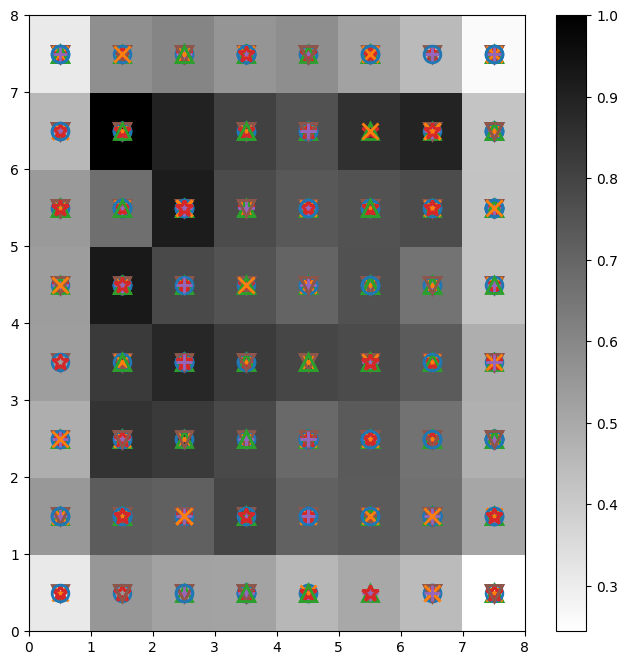

In [57]:
# plot the distance map
plt.figure(figsize=(8, 8))
plt.pcolor(som.distance_map().T, cmap='gist_yarg')
plt.colorbar()
# create the markers and colors for each class
markers = ['o', 'x', '^','*','+','v']
colors = ['C0', 'C1', 'C2','C3','C4','C5']
# plot the winning neuron for each data point
for count, datapoint in enumerate(X_test):
    # get the winner
    w = som.winner(datapoint)
    # place a marker on the winning position for the sample data point
    plt.plot(w[0]+.5, w[1]+.5, markers[y_test[count]-1], markerfacecolor='None',
             markeredgecolor=colors[y_test[count]-1], markersize=12, markeredgewidth=2)
plt.show()
